## Линейные модели

В данном ноутбуке затрагиваются такие темы как МНК, регрессия и регуляризация

Начнём с загрузки необходимых библиотек и функций.

Параметр `seed` будет использоваться далее для инициализации генератора случайных чисел из библиотеки `numpy`.

In [226]:
import numpy as np
import pandas as pd
from typing import Optional, List

import sklearn.base

seed = 24

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

В этом ноутбуке мы будем практиковаться на датасете ["The Ames Iowa Housing Data"](https://www.openml.org/d/41211). Здесь собраны описания и цены жилья в городе Эймс, штат Айова. Мы будем решать задачу предсказания цены (`Sale_Price`) по всем остальным признакам.

И начнём мы, конечно, с того, что внимательно посмотрим на датасет: какие там есть объекты и какие признаки.

In [2]:
# !pip install numpy pandas sklearn matplotlib
!curl https://api.openml.org/data/get_csv/20649135/file2ed11cebe25.arff > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22399    0 22399    0     0  17389      0 --:--:--  0:00:01 --:--:-- 17390
100  218k    0  218k    0     0  97355      0 --:--:--  0:00:02 --:--:-- 97353
100  480k    0  480k    0     0   144k      0 --:--:--  0:00:03 --:--:--  144k
100  742k    0  742k    0     0   173k      0 --:--:--  0:00:04 --:--:--  173k
100 1097k    0 1097k    0     0   208k      0 --:--:--  0:00:05 --:--:--  218k
100 1553k    0 1553k    0     0   248k      0 --:--:--  0:00:06 --:--:--  307k
100 1646k    0 1646k    0     0   255k      0 --:--:--  0:00:06 --:--:--  344k


In [228]:
data = pd.read_csv('./data.csv')

data.sample(20)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1812,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,65,8450,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Good_Privacy,None,0,12,2007,WD,Normal,179000,-93.688804,42.036038
2614,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,73,7100,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,7,2006,WD,Normal,129900,-93.609073,42.038297
1208,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,100,10175,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,7,2008,WD,Normal,180500,-93.629555,42.040660
452,One_Story_PUD_1946_and_Newer,Residential_Low_Density,34,5381,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,8,2009,WD,Normal,196000,-93.649743,42.059179
1820,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,7420,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2007,WD,Normal,132000,-93.673987,42.035871
2133,Two_Story_1946_and_Newer,Residential_Low_Density,72,11317,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,9,2007,WD,Normal,180000,-93.692052,42.016214
2004,Split_or_Multilevel,Residential_Medium_Density,76,11800,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,5,2007,WD,Normal,110000,-93.605116,42.027270
361,Two_Story_1946_and_Newer,Residential_Low_Density,65,8125,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,3,2009,WD,Normal,174000,-93.636822,42.058173
64,Two_Story_1946_and_Newer,Residential_Low_Density,58,16770,Pave,No_Alley_Access,Moderately_Irregular,Lvl,AllPub,CulDSac,...,No_Fence,None,0,6,2010,WD,Normal,221000,-93.650578,42.052437
126,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,68,9717,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2010,WD,Normal,142125,-93.622864,42.039211


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Разобьём данные на обучающую и тестовую выборки.

In [229]:
target_column = "Sale_Price"
np.random.seed(seed)

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Sale_Price")],
    np.array(data["Sale_Price"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


Среди признаков нам встретятся как вещественные, так и категориальные. Пока что выделим в качестве категориальных те, значениями которых являются не числа, а какие-то другие сущности (но помним, что численные с виду признаки тоже могут быть категориальными).

In [230]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

continuous_columns.remove(target_column)

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Continuous : 34, Categorical : 46


Посмотрим на заголовки признаков. В целом, многие названия вполне говорящие, и можно догадаться, что стоит за этими признаками.

In [231]:
continuous_columns

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'Three_season_porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val',
 'Mo_Sold',
 'Year_Sold',
 'Longitude',
 'Latitude']

In [232]:
data[continuous_columns]

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Longitude,Latitude
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,62,0,0,0,0,0,5,2010,-93.619754,42.054035
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,120,0,0,6,2010,-93.619756,42.053014
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,36,0,0,0,0,12500,6,2010,-93.619387,42.052659
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,0,0,4,2010,-93.617320,42.051245
4,74,13830,1997,1998,0,3,0,137,928,928,...,34,0,0,0,0,0,3,2010,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37,7937,1984,1984,0,3,0,184,1003,1003,...,0,0,0,0,0,0,3,2006,-93.604776,41.988964
2926,0,8885,1983,1983,0,2,324,239,864,902,...,0,0,0,0,0,0,6,2006,-93.602680,41.988314
2927,62,10441,1992,1992,0,3,0,575,912,970,...,32,0,0,0,0,700,7,2006,-93.606847,41.986510
2928,77,10010,1974,1975,0,1,123,195,1389,1389,...,38,0,0,0,0,0,4,2006,-93.600190,41.990921


In [233]:
scaler = StandardScaler()
k = scaler.fit_transform(data[continuous_columns])
data[continuous_columns]
k

array([[ 2.48859217,  2.74438073, -0.37553701, ...,  1.678499  ,
         0.90067064,  1.06225025],
       [ 0.66735543,  0.18709726, -0.34246845, ...,  1.678499  ,
         0.9005928 ,  1.00678201],
       [ 0.69721177,  0.5228137 , -0.44167415, ...,  1.678499  ,
         0.91494179,  0.9874958 ],
       ...,
       [ 0.12994131,  0.03719892,  0.68265709, ..., -1.36011828,
         1.40298265, -2.60620505],
       [ 0.57778641, -0.01750572,  0.0874229 , ..., -1.36011828,
         1.66205843, -2.36656704],
       [ 0.48821739, -0.06611797,  0.71572565, ..., -1.36011828,
         1.66960848, -2.45653316]])

Знакомимся с fit-predict (fit-transform) интерфейсом, типичным для многих реализаций моделей машинного обучения и для различных инструментов работы с данными.

***fit*** — метод для обучения алгоритма. Он получает на входе данные и таргеты для обучения, после чего обновляет состояние класса. После использования метода fit считается, что объект класса готов к использованию. Внутри этого метода может быть что угодно: обучение модели, подбор гиперпараметров, подсчет статистик и т. д.

***predict*** — метод для предсказания , обученного с помощью _fit_. В задаче регрессии это оценка параметра, в задаче классификации предсказанный класс.

***transform*** — стилистический синоним _predict_, но используется в классах, которые реализуют преобразования данных, например, масштабирование признаков или кодирование категориальных фичей.

***fit_transform*** — метод который учится на данных, а потом их же преобразовывает.

### 1. Базовая предобработка данных

Отметим два важных свойства линейной регрессии:

- строго говоря, она умеет работать только с вещественными признаками
- если признаки имеют разный масштаб при сопоставимой важности, регрессия может проигнорировать те, что имеют меньший масштаб

Первое соображение заставляет придумывать способы борьбы с категориальными признаками, и мы начнём с самого простого: проигнорируем их.

Второе соображение приводит к необходимости приводить признаки к одному масштабу ("нормализовать фичи"). В `sklearn` для этого есть два основных класса:

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - в каждой колонке вычитает среднее и делит на стандартное отклонение.
- [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - в каждой колонке вычитает минимальное значение и делит на разницу между минимальным и максимальным.

Применяются они в соответствии с описанной выше философией. Например:

```
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

Обратим внимание, что scaler настраивается на обучающей выборке (именно по ней вычисляются среднее и стандартное отклонение), а к тестовой он применяется с уже подсчитанными статистиками.

Если мы по-разному отнормируем обучающую и тестовую выборки, то нам будет весьма сложно применять модель, обученную на одной из них, к другой. Это просто не будет иметь физического смысла.

Настраивать что-либо на тестовой выборке — это очень плохая идея. Тестовая выборка должна быть неким независимым мерилом качества наших усилий по предсказанию, а если мы разрешим информации о распределении признаков в тестовой выборке "протечь" в процесс обучения, то мы эту независимость испортим.

Итак, мы решили делать преобразование данных, которое состоит в:

- сохранении лишь непрерывных фичей;
- нормализации этих фичей (давайте остановимся на [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

Сделаем класс такой предобработки данных, причём оформим мы его в виде класса с интерфейсом fit-transform.

In [235]:
#%%writefile 1.py
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from typing import Optional, List
from sklearn.base import TransformerMixin

class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.columns = needed_columns

    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        if self.columns is None:
            self.scaler.fit(data)
        else:
            self.scaler.fit(data[self.columns])
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        if self.columns is None:
            d = self.scaler.transform(data)
        else:
            d = self.scaler.transform(data[self.columns])
        return np.array(d)

In [236]:
preprocessor = BaseDataPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
X_test = preprocessor.transform(data_test)

In [237]:
data_train

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
954,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,82,11070,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,4,2009,COD,Abnorml,-93.602424,41.996066
54,Split_or_Multilevel,Residential_Low_Density,67,13300,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,6,2010,WD,Normal,-93.644076,42.061443
2612,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,79,8910,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,7,2006,WD,Normal,-93.607257,42.038500
429,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,95,12350,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,5,2009,WD,Normal,-93.654439,42.062258
1428,Split_or_Multilevel,Residential_Low_Density,0,11454,Pave,No_Alley_Access,Moderately_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,2,2008,WD,Normal,-93.681136,42.030276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,8190,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,10,2007,WD,Normal,-93.663329,42.019937
343,Split_or_Multilevel,Residential_Low_Density,75,13860,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,7,2009,WD,Normal,-93.615524,42.049322
2240,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,75,13710,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2007,WD,Normal,-93.626689,42.021497
899,Duplex_All_Styles_and_Ages,Residential_Low_Density,65,10926,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,8,2009,WD,Normal,-93.664402,42.018220


In [238]:
data_test

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
1135,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,66,13695,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,6,2008,WD,Normal,-93.690761,42.037806
936,Split_or_Multilevel,Residential_Low_Density,0,13607,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,Shed,1500,4,2009,WD,Normal,-93.644864,42.010636
1353,One_and_Half_Story_Finished_All_Ages,Residential_Low_Density,60,9144,Pave,Paved,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,3,2008,WD,Normal,-93.625539,42.028274
2787,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,7200,Pave,No_Alley_Access,Regular,Low,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,3,2006,WD,Normal,-93.682979,42.020998
2509,Two_Story_PUD_1946_and_Newer,Floating_Village_Residential,30,3180,Pave,Paved,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,4,2006,WD,Abnorml,-93.644891,42.047595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,Two_Story_1946_and_Newer,Residential_Low_Density,58,9487,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,6,2007,WD,Normal,-93.641323,42.057836
2696,Two_Family_conversion_All_Styles_and_Ages,Residential_Medium_Density,60,6780,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,6,2006,WD,Normal,-93.629501,42.022825
2915,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,80,13384,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,5,2006,WD,Normal,-93.600439,41.991708
81,Two_Story_1946_and_Newer,Residential_Low_Density,70,8400,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,4,2010,WD,Normal,-93.685029,42.034678


In [239]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.727818,0.109997,0.658250,0.341616,-0.558460,-0.960575,-0.29858,2.176153,1.237653,1.134642,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,-0.811794,0.918974,1.599532,-2.103994
1,0.282781,0.379230,1.094137,0.961464,-0.558460,-0.512943,-0.29858,-1.120485,-1.560735,-1.080711,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,-0.069655,1.678789,-0.030264,1.465446
2,0.638811,-0.150784,-0.414702,-1.184163,-0.558460,-1.408207,-0.29858,-1.250645,-0.927710,0.090745,...,-0.705320,2.599064,-0.108772,-0.285117,-0.061096,-0.1017,0.301415,-1.360471,1.410422,0.212809
3,1.113517,0.264535,1.228256,1.152186,1.943147,-0.512943,-0.29858,0.517735,2.260770,2.241016,...,0.789982,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,-0.440725,0.918974,-0.435757,1.509944
4,-1.705052,0.156358,0.792369,0.532339,1.120396,-0.512943,-0.29858,0.165406,0.814859,0.915970,...,-0.064476,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,-1.553934,0.159159,-1.480381,-0.236203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,0.075097,-0.237711,-0.582350,-1.422566,-0.558460,0.829953,-0.29858,-0.765912,-0.243297,-0.549651,...,-0.156025,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,1.414624,-0.600656,-0.783613,-0.800690
2340,0.520134,0.446840,0.021185,0.532339,-0.558460,-0.512943,-0.29858,-0.034323,2.101930,2.188952,...,0.988339,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,0.301415,0.918974,1.086944,0.803666
2341,0.520134,0.428730,-0.716469,-1.613289,-0.558460,-0.960575,-0.29858,-0.151018,-0.332060,-0.648574,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,-0.069655,-0.600656,0.650070,-0.715518
2342,0.223443,0.092612,-0.414702,-1.184163,-0.147084,1.277585,-0.29858,2.515018,1.461898,1.350710,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.1017,0.672485,0.918974,-0.825614,-0.894435


In [240]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.253112,0.426919,1.094137,0.961464,-0.558460,-0.512943,-0.298580,-0.200389,0.144460,-0.117514,...,0.851015,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-0.069655,0.159159,-1.856996,0.174918
1,-1.705052,0.416295,0.490601,0.103213,0.786849,-1.408207,-0.298580,-0.985837,-1.121589,0.059506,...,1.003597,-0.354181,-0.108772,-0.285117,-0.061096,3.592039,-0.811794,0.918974,-0.061098,-1.308504
2,0.075097,-0.122533,-1.890010,0.961464,-0.558460,1.277585,-0.298580,0.567106,-0.565648,0.028267,...,2.270026,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-1.182864,0.159159,0.695068,-0.345508
3,0.075097,-0.357236,0.021185,-0.564315,-0.558460,-0.960575,-0.298580,-0.292399,-0.439511,-0.768323,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-1.182864,-1.360471,-1.552495,-0.742762
4,-0.814977,-0.842580,1.127666,1.009145,-0.558460,1.277585,-0.298580,0.095837,-1.056184,-1.663836,...,1.827539,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-0.811794,-1.360471,-0.062154,0.709376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.015759,-0.081122,0.960018,0.770742,-0.558460,-0.512943,-0.298580,-0.364211,-0.320381,-0.570477,...,0.057589,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-0.069655,-0.600656,0.077458,1.268512
582,0.075097,-0.407944,-1.219416,-0.087509,-0.558460,-0.512943,-0.298580,-1.183321,-1.243055,-1.663836,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-0.069655,-1.360471,0.540039,-0.643012
583,0.668480,0.389372,-0.079404,-0.230551,0.520011,0.829953,1.725328,0.187847,0.121101,0.522881,...,-0.705320,-0.354181,-0.108772,-0.285117,-0.061096,-0.101700,-0.440725,-1.360471,1.677203,-2.341932
584,0.371788,-0.212358,0.289423,-0.135190,0.164227,1.277585,-0.298580,0.208044,-0.939390,-0.705845,...,0.057589,-0.354181,-0.108772,3.235961,-0.061096,-0.101700,-0.811794,1.678789,-1.632710,0.004136


### 1.2 Умная предобработка данных

Зачастую оказывается гораздо продуктивнее потратить какое-то время на изучение предметной области и придумывание хороших фичей (feature engineering), нежели жадно перебирать все известные алгоритмы машинного обучения.

Например в датасете есть координаты квартиры, которые по идее сами по себе мало чего дают нашему регрессору. С другой стороны, по ним можно оценить центр города (или просто найти его на карте) и использовать в качестве фичи расстояние до центра города, которое может естественным образом влиять на цену жилья.

Ещё может быть полезным почистить пропуски. Возможно, мы хотим эти нулевые значения заменить чем-нибудь, скажем, медианой.

### 2. Линейная регрессия

Давайте получим базовое решение (бейзлайн), чтобы потом с ним можно было сравниваться.

Обучим линейную регрессию на обучающей выборке (которую мы подвергли преобразованию BaseDataPreprocessor).

Начнём с обычной регрессии. Получим предсказания на тестовых данных и оценим на них качество модели.


In [241]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [242]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, Y_train)
test_preds = model.predict(X_test)
metrics.mean_absolute_error(Y_test, test_preds)

23823.26079705827

Теперь попробуйте L2-регуляризованную модель Ridge()

In [243]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [244]:
model = Ridge(10)  # объявляем модель
model.fit(X_train, Y_train)
test_preds = model.predict(X_test)
metrics.mean_absolute_error(Y_test, test_preds)

23816.340137451196

In [245]:
model.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

В целом, регуляризация редко портит модель, но важно правильно подобрать коэффициент регуляризации

### 3. Выбор метрики

Средний модуль ошибки (MAE) — в целом довольно хорошая метрика для задачи регрессии, потому что ее довольно легко проинтерпретировать. Но с ней есть одна проблема: ошибиться на $ 10 000 $ USD в предсказании цены квартиры стоимостью $ 100 000 $ USD страшнее чем допустить такую ошибку в предсказании цены жилья за $ 700 000 $ USD. Иными словами более показательной метрикой будет не абсолютная  ошибка $ error_i = |y_i - \hat{y_i}|$, а логарифм относительной ошибки $error_i = log \frac{y_i}{\hat{y_i}} $. Также давайте обычное усреднение по всем примерам в тестовой выборке заменим на среднеквадратичное $ \frac{1}{N} \sum_i^{test} {error_i} \longrightarrow \sqrt{\frac{1}{N} \sum_i^{test}{(error_i)^2}}$. Итоговая метрика получается равной:

$$
Metric = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (log(y_i) - log(\hat{y_i}))^2}
$$

Логично? Да. Но возникает еще одна проблема. Логарифм нельзя брать от отрицательного числа. Бороться с этим можно двумя способами.
- Случай когда отрицательное число затисалось в target-ax не очень разумен, т. к. цена на дом не может быть отрицательной. В этом случае стоит кинуть ошибку, чтобы пользователь этой функции еще раз перепроверил правильные ли таргеты он подает.
- В целом, у нас нет гарантий того, что наша модель (например линейная) предсказывает только положительные числа. Брать логарифм от отрицательного числа не получится, но качество такой модели все еще надо оценить. Давайте все предсказания, которые меньше некоторого порога $ a_{min} $, заменять этим порогом ($ \hat{y_i} \longleftarrow max(\hat{y_i}, a_{min}) $), после чего подавать их в метрику. Возьмем $ a_{min} = 1 $.

In [246]:
import numpy as np

def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
    if min(y_true) <= 0:
        raise ValueError('Error, some targets are negative')
    else:
        y_pred[y_pred < a_min] = a_min
        return np.sqrt(np.mean((np.log(y_true) - np.log(y_pred)) ** 2))

In [247]:
root_mean_squared_logarithmic_error(np.array([1]), np.array([1]))

0.0

### 4. Логарифмирование таргета.

Вообще идея с логарифмированием таргета довольно хороша для этой задачи. Давайте посмотрим на распределение обычных и логарифмированных таргетов.

In [248]:
def plot_target_distribution(Y_train, Y_test, ax, n_bins=20):
    ax.hist(Y_train, bins=n_bins, label="train", color="red", alpha=0.3, density=True)
    ax.hist(Y_test, bins=n_bins, label="test", color="blue", alpha=0.3, density=True)

    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")


def plot_both_distributions(Y_train, Y_test):
    fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    plot_target_distribution(Y_train, Y_test, ax=ax0)
    ax0.set_title("Standard")

    plot_target_distribution(np.log(Y_train), np.log(Y_test), ax=ax1)
    ax1.set_title("Logarithmic")

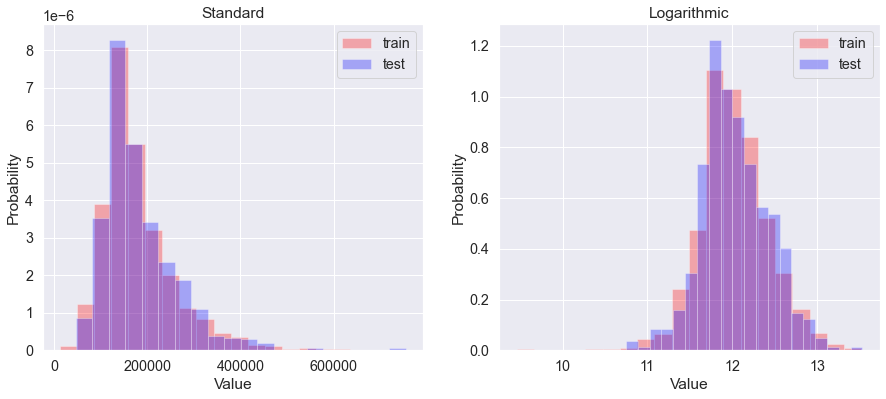

In [249]:
plot_both_distributions(Y_train, Y_test)

Как видим, если прологарифмировать таргеты, то их распределение станет более похоже на гауссовское. Интуиция подсказывает, что линейная регрессия с MSE loss-функцией должна лучше учиться на таких таргетах.

Попробуем написать класс, который во время обучения логарифмирует таргет, а во время предсказания — наоборот, экспоненциирует. После чего обучим оба метода на обучающих данных и сравним значения метрик MAE и MSLE на тесте.

In [250]:
#%%writefile 3.py 
#Второй способ
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.base import RegressorMixin

class ExponentialLinearRegression(RegressorMixin):
    def __init__(self, *args, **kwargs):
        self.ridge = Ridge(*args, **kwargs)

    def fit(self, X, Y):
        self.ridge.fit(X, np.log(Y))
        return self

    def predict(self, X):
        return np.e ** self.ridge.predict(X)

    def get_params(self, *args, **kwargs):
        return self.ridge.get_params(*args, **kwargs)

    def set_params(self, *args, **kwargs):
        self.ridge.set_params(*args, **kwargs)

In [251]:
classic_regressor = Ridge()
exponential_regressor = ExponentialLinearRegression()

classic_regressor.fit(X_train, Y_train)
exponential_regressor.fit(X_train, Y_train)

classic_prediction = classic_regressor.predict(X_test)
exponential_prediction = exponential_regressor.predict(X_test)

print(f"MAE  : Classic : {mean_absolute_error(Y_test, classic_prediction)}  Exponential : {mean_absolute_error(Y_test, exponential_prediction)}")
print(f"MSLE : Classic : {root_mean_squared_logarithmic_error(Y_test, classic_prediction)} Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

MAE  : Classic : 23821.977761006812  Exponential : 26818.699786544374
MSLE : Classic : 0.19500621233281323 Exponential : 0.21601027716185425


In [252]:
from sklearn.metrics import mean_absolute_error

In [253]:
#Первый способ
class ExponentialLinearRegression(Ridge):
    def fit(self, X, Y):
        super().fit(X, np.log(Y))
        return self

    def predict(self, X):
        return np.e ** super().predict(X)

In [254]:
classic_regressor = Ridge()
exponential_regressor = ExponentialLinearRegression()

classic_regressor.fit(X_train, Y_train)
exponential_regressor.fit(X_train, Y_train)

classic_prediction = classic_regressor.predict(X_test)
exponential_prediction = exponential_regressor.predict(X_test)

print(f"MAE  : Classic : {mean_absolute_error(Y_test, classic_prediction)}  Exponential : {mean_absolute_error(Y_test, exponential_prediction)}")
print(f"MSLE : Classic : {root_mean_squared_logarithmic_error(Y_test, classic_prediction)} Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

MAE  : Classic : 23821.977761006812  Exponential : 26818.699786544374
MSLE : Classic : 0.19500621233281323 Exponential : 0.21601027716185425


Иногда получается так, что разные обученные вами модели приводят к улучшению одних метрик и ухудшению других. Это абсолютно нормально и этому не надо удивляться.

Также зачастую случается так, что прирост по метрике не очень большой. И вы можете захотеть убедиться, что это реальное улучшение, а не просто случайная флуктуация. Для этого можно использовать подсчёт метрики про кросс-валидации (подробнее о ней можно почитать в соответствующей [главе учебника](https://ml-handbook.ru/chapters/cross_validation/intro)). Суть метода в следующем:

- мы разбиваем (случайным образом!) доступную нам выборку на $K$ (часто $K=5$) частей, которые называются _фолдами_
- мы обучаем нашу модель $K$ раз, уча на всех фолдах, кроме одного, а на этом одном тестируя
- мы получаем $K$ значений метрики, которые вместе дают нам лучшее представление о том, как ведёт себя модель на разных разбиениях на трейн и тест. В качестве итоговой метрики можно, к примеру, взять среднее полученных значений

Сделать всё это можно с помощью обёртки [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), в которую можно подать модель, датасет и интересующую вас метрику. При этом оценку по кросс-валидации можно делать на всей доступной у вас выборке (ибо кросс-валидация уже включает разбиение на трейн и тест).

Вычислим оценки MAE по кросс-валидации обычной (не регуляризованной) линейной регрессии и ExponentialLinearRegression на объединении обучающей и тестовой выборок.

In [255]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

pipeline_lin = Pipeline([
    #("Preprocessor", BaseDataPreprocessor(needed_columns=continuous_columns)),
    ("LinearRegressor", LinearRegression())
])
pipeline_exp = Pipeline([
    #("Preprocessor", BaseDataPreprocessor(needed_columns=continuous_columns)),
    ("ExpLin", ExponentialLinearRegression())
])

cv=KFold(n_splits=5, shuffle=True, random_state=42)
columns = data.columns
X = pd.DataFrame(np.vstack((X_train, X_test)))
Y = pd.Series(np.hstack((Y_train, Y_test)))

score = [[], []]
for train_index, test_index in cv.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    pipeline_lin.fit(X_train, y_train)
    score[0].append(mean_absolute_error(pipeline_lin.predict(X), Y))
    
    pipeline_exp.fit(X_train, y_train)
    score[1].append(mean_absolute_error(pipeline_exp.predict(X), Y))
score

[[22926.103854352896,
  22625.716315508093,
  22565.174380822376,
  22865.837286043603,
  22853.389587407364],
 [20372.199707536634,
  20339.797012704174,
  20020.6555951099,
  20324.344043599805,
  20120.76957481621]]

In [259]:
np.array(score[0]).mean()

22767.244284826866

In [260]:
np.array(score[1]).mean()

20235.553186753343

### 5. Подбор гиперпараметров

Линейную регрессию почти всегда можно улучшить с помощью регуляризации. Но при этом у нас возникает **гиперпараметр** — коэффициент регуляризации, и подбирать его нужно правильно.

Самый тривиальный способ — подбор по сетке. В данном случае это значит, что мы фиксируем несколько значений коэффициента регуляризации ```alpha``` и просто для каждого из них смотрим, что получится. Но важно отметить, что коэффициенты регуляризации стоит перебирать по _логарифмической_ сетке, например: `1e-2, 1e-1, 1, 1e+1, 1e+2`.

Разобравшись, что перебирать, перейдём к вопросу о том, как оценивать. Есть два основных подхода:

— Train-Val-Test split. Датасет делится на три части, на одной модели учатся, на другой подбираются гиперпараметры, на третьей считаются финальные метрики. Этот метод довольно шумный, зато быстрый.
— Кроссвалидация. Она значительно дольше, но надёжней. В этом пункте мы воспользуемся именно ей.

In [264]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

my_scorer = make_scorer(root_mean_squared_logarithmic_error, greater_is_better=False)
parameters = {'alpha': np.logspace(-3, 3, num=7, base=10.)}
model = ExponentialLinearRegression()
clf = GridSearchCV(model, parameters, scoring=my_scorer)
clf.fit(pd.DataFrame(np.vstack((X_train, X_test))), pd.Series(np.hstack((Y_train, Y_test))))
clf.best_params_

{'alpha': 1000.0}

In [262]:
alpha = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
for a in alpha:
    exponential_regressor = ExponentialLinearRegression(a)
    exponential_regressor.fit(X_train, Y_train)
    exponential_prediction = exponential_regressor.predict(X_test)
    print(f"Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

Exponential : 0.4009945293964864
Exponential : 0.400994520165434
Exponential : 0.4009944278077741
Exponential : 0.400993499541922
Exponential : 0.40098377148900477
Exponential : 0.4008587066062772
Exponential : 0.39970638235060935


In [263]:
from sklearn.metrics import make_scorer

pipeline_exp = Pipeline([
    #("Preprocessor", BaseDataPreprocessor(needed_columns=continuous_columns)),
    ("Exp", ExponentialLinearRegression())
])

params = [{'alpha': np.logspace(-3, 3, num=7, base=10.)}]

for elem in params[0]["alpha"]:
    pipeline_exp.set_params(Exp__alpha=elem)
    pipeline_exp.fit(X_train, Y_train)
    print(str(elem).ljust(15), root_mean_squared_logarithmic_error(pipeline_exp.predict(X_test), Y_test))

0.001           0.4009945293964864
0.01            0.400994520165434
0.1             0.4009944278077741
1.0             0.400993499541922
10.0            0.40098377148900477
100.0           0.4008587066062772
1000.0          0.39970638235060935


In [349]:
from sklearn.metrics import make_scorer

pipeline = Pipeline([("ELR", ExponentialLinearRegression())])
exp_model = ExponentialLinearRegression()

params = [{'ELR__alpha': np.logspace(-3, 3, num=7, base=10.)}]

scorer = make_scorer(root_mean_squared_logarithmic_error, greater_is_better=False)

grid = GridSearchCV(pipeline, params, scoring=scorer, cv=5)
grid.fit(X, Y)
grid.best_params_

{'ELR__alpha': 100.0}

### 6. Линейная модель своими руками

В этом разделе мы напишем собственный класс линейной модели, чтобы лучше разобраться, как работает обучение с помощью SGD.

Линейная модель делает предсказание по такой формуле:
$$
\hat{y_i} = \langle \vec{w}, \vec{x_i} \rangle + b
$$
Здесь $\vec{w}$ и b - обучаемые параметры. $\vec{x_i}$ - вектор фичей данного примера.
$\vec{w}$ и b находятся из задачи минимизации лосс функции:

$$
\vec{w}, b = {argmin}_{\vec{w}, b}(L) \ ; \ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 + \lambda \vec{w}^T\vec{w}
$$

Задачу минимизации лосс функции мы будем решать градиентным спуском. Для этого надо найти градиенты лосса по параметром модели.

$$
\nabla_b L = \frac{2}{N} sum(X \vec{w} + b - \vec{y})\\
\nabla_{\vec{w}} L = \frac{2}{N} X^T(X \vec{w} + b - \vec{y}) + 2\lambda \vec{w}
$$

Теперь давайте реализуем этот алгоритм ввиде класса с методами fit-predict.

In [178]:
#%%writefile 6.py
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.base import RegressorMixin

class SGDLinearRegressor(RegressorMixin):
    def __init__(self,
                 lr=0.01, regularization=1., delta_converged=1e-3, max_steps=1000,
                 batch_size=64):
        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X, Y):
        #X_new = np.hstack((X, np.ones(X.shape[0]).reshape(-1,1)))
        step = 0
        self.W = np.random.normal(0, 1, (X.shape[1]))
        self.b = int(np.random.normal(0, 1, 1))
        w_old = self.W
        b_old = self.b
        while step < self.max_steps:
            batch_indices = np.random.choice(X.shape[0], size=self.batch_size, replace=False)
            batch = X[batch_indices]
            w_old = self.W
            b_old = self.b
            
            grad_w = 1 / self.batch_size * batch.T.dot(batch.dot(self.W) + self.b - Y[batch_indices])
            grad_b = 1 / self.batch_size * np.sum(batch.dot(self.W) + self.b - Y[batch_indices])
            self.W = self.W - self.lr * (grad_w + self.regularization * self.W)
            self.b = self.b - self.lr * grad_b # РЕГУЛЯРИЗОВАТЬ СВОБОДНЫЙ ЧЛЕН НЕЛЬЗЯ!!!!
            if np.linalg.norm(np.append(self.W, self.b) - np.append(w_old, b_old)) < self.delta_converged:
                break
            step += 1

    def predict(self, X):
        return X.dot(self.W) + self.b

Overwriting 6.py


In [177]:
# Check yourself

model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25715.339401870395
Mean log :  0.1882974255511106


### 7. Категориальные признаки

В самом начале ноутбука мы отбросили категориальные фичи, хотя они могут помочь нам сделать модель лучше. Давайте же научимся ими пользоваться.

Самый простой подход — это закодировать значения категориального признака числами, скажем, от $0$ до $C-1$, где $C$ — количество значений категориального признака. Иногда это может сработать, но для этого нужно, чтобы между значениями признака были определены отношения больше/меньше (такие признаки называются _ординальными_), причём соотношения между значениями должны быть более-менее линейными. В целом, не очень частая ситуация, поэтому так мы делать не будем.

Вместо этого мы будем использовать OneHotEncoding. Пусть некоторая категориальная фича имеет $C$ уникальных значений. Давайте эту фичу закодируем в виде $C$ столбцов, каждый из которых соответствует некоторому уникальному значению категориальной фичи. Для каждого элемента выборки будем класть единичку в столбец, соответствующий этой фиче, и нолики в остальные.

У этого метода есть недостаток. Если категориальная фича принимает слишком много значений, то вы нагенерируете много новых столбцов, каждый из которых будет содержать мало информации. Из-за них моделька может переобучиться.

Еще раз предобработаем данные, добавив в них часть категориальных фичей, закодированных OneHotEncoding-ом. После этого обучим классификатор заново и выбьем лучшую метрику на тестовой выборке. А именно, мы добавим фичи "Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning".

In [265]:
data_train

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
954,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,82,11070,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,4,2009,COD,Abnorml,-93.602424,41.996066
54,Split_or_Multilevel,Residential_Low_Density,67,13300,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,6,2010,WD,Normal,-93.644076,42.061443
2612,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,79,8910,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,7,2006,WD,Normal,-93.607257,42.038500
429,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,95,12350,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,5,2009,WD,Normal,-93.654439,42.062258
1428,Split_or_Multilevel,Residential_Low_Density,0,11454,Pave,No_Alley_Access,Moderately_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,2,2008,WD,Normal,-93.681136,42.030276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,8190,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,10,2007,WD,Normal,-93.663329,42.019937
343,Split_or_Multilevel,Residential_Low_Density,75,13860,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,7,2009,WD,Normal,-93.615524,42.049322
2240,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,75,13710,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2007,WD,Normal,-93.626689,42.021497
899,Duplex_All_Styles_and_Ages,Residential_Low_Density,65,10926,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,8,2009,WD,Normal,-93.664402,42.018220


In [266]:
class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.columns = needed_columns

    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        if self.columns is None:
            self.scaler.fit(data)
        else:
            self.scaler.fit(data[self.columns])
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        if self.columns is None:
            d = self.scaler.transform(data)
        else:
            d = self.scaler.transform(data[self.columns])
        return np.array(d)

In [367]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, **kwargs):
        super(OneHotPreprocessor, self).__init__(**kwargs)
        interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]
        self.col = interesting_columns
        self.encoder = OneHotEncoder(handle_unknown = 'ignore')

    def fit(self, data, *args):
        self.encoder.fit(data[self.col])
        self.scaler.fit(data[self.columns])
        return self

    def transform(self, data):
        d = self.scaler.transform(data[self.columns])
        d1 = self.encoder.transform(data[self.col])
        return np.hstack((np.array(d), np.array(d1.toarray())))

In [368]:
preprocessor = OneHotPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
X_test = preprocessor.transform(data_test)

In [370]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.727818,0.109997,0.658250,0.341616,-0.558460,-0.960575,-0.29858,2.176153,1.237653,1.134642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.282781,0.379230,1.094137,0.961464,-0.558460,-0.512943,-0.29858,-1.120485,-1.560735,-1.080711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.638811,-0.150784,-0.414702,-1.184163,-0.558460,-1.408207,-0.29858,-1.250645,-0.927710,0.090745,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.113517,0.264535,1.228256,1.152186,1.943147,-0.512943,-0.29858,0.517735,2.260770,2.241016,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.705052,0.156358,0.792369,0.532339,1.120396,-0.512943,-0.29858,0.165406,0.814859,0.915970,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,0.075097,-0.237711,-0.582350,-1.422566,-0.558460,0.829953,-0.29858,-0.765912,-0.243297,-0.549651,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2340,0.520134,0.446840,0.021185,0.532339,-0.558460,-0.512943,-0.29858,-0.034323,2.101930,2.188952,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2341,0.520134,0.428730,-0.716469,-1.613289,-0.558460,-0.960575,-0.29858,-0.151018,-0.332060,-0.648574,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2342,0.223443,0.092612,-0.414702,-1.184163,-0.147084,1.277585,-0.29858,2.515018,1.461898,1.350710,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [371]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.253112,0.426919,1.094137,0.961464,-0.558460,-0.512943,-0.298580,-0.200389,0.144460,-0.117514,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.705052,0.416295,0.490601,0.103213,0.786849,-1.408207,-0.298580,-0.985837,-1.121589,0.059506,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.075097,-0.122533,-1.890010,0.961464,-0.558460,1.277585,-0.298580,0.567106,-0.565648,0.028267,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.075097,-0.357236,0.021185,-0.564315,-0.558460,-0.960575,-0.298580,-0.292399,-0.439511,-0.768323,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.814977,-0.842580,1.127666,1.009145,-0.558460,1.277585,-0.298580,0.095837,-1.056184,-1.663836,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.015759,-0.081122,0.960018,0.770742,-0.558460,-0.512943,-0.298580,-0.364211,-0.320381,-0.570477,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582,0.075097,-0.407944,-1.219416,-0.087509,-0.558460,-0.512943,-0.298580,-1.183321,-1.243055,-1.663836,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
583,0.668480,0.389372,-0.079404,-0.230551,0.520011,0.829953,1.725328,0.187847,0.121101,0.522881,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
584,0.371788,-0.212358,0.289423,-0.135190,0.164227,1.277585,-0.298580,0.208044,-0.939390,-0.705845,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 8. Pipeline

In [377]:
continuous_columns

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'Three_season_porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val',
 'Mo_Sold',
 'Year_Sold',
 'Longitude',
 'Latitude']

In [380]:
#%%writefile 7.py
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from typing import Optional, List
from sklearn.base import TransformerMixin
from sklearn.linear_model import Ridge, Lasso, ElasticNet

class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.columns = needed_columns

    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        if self.columns is None:
            self.scaler.fit(data)
        else:
            self.scaler.fit(data[self.columns])
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        if self.columns is None:
            d = self.scaler.transform(data)
        else:
            d = self.scaler.transform(data[self.columns])
        return np.array(d)

class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, **kwargs):
        super(OneHotPreprocessor, self).__init__(**kwargs)
        interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]
        self.col = interesting_columns
        self.encoder = OneHotEncoder(handle_unknown = 'ignore')

    def fit(self, data, *args):
        self.encoder.fit(data[self.col])
        self.scaler.fit(data[self.columns])
        return self

    def transform(self, data):
        d = self.scaler.transform(data[self.columns])
        d1 = self.encoder.transform(data[self.col])
        return np.hstack((np.array(d), np.array(d1.toarray())))

def make_ultimate_pipeline():
    pipeline = Pipeline([
    ("Preprocessor", OneHotPreprocessor(needed_columns=['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'Three_season_porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val',
 'Mo_Sold',
 'Year_Sold',
 'Longitude',
 'Latitude'])),
    ("Ridge", Ridge(100))
    ])
    return pipeline